<a href="https://colab.research.google.com/github/sumit9509/Colab-Notebook/blob/main/Early_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
disease = pd.read_csv('/content/drive/MyDrive/Early Disease Detection.csv')

In [5]:
disease.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [6]:
disease['date'] = pd.to_datetime(disease['date'], format='%d-%m-%Y')

In [7]:
# info of data
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         70000 non-null  datetime64[ns]
 1   country      70000 non-null  object        
 2   id           70000 non-null  int64         
 3   active       70000 non-null  int64         
 4   age          70000 non-null  int64         
 5   alco         70000 non-null  int64         
 6   ap_hi        70000 non-null  int64         
 7   ap_lo        70000 non-null  int64         
 8   cholesterol  70000 non-null  int64         
 9   gender       70000 non-null  int64         
 10  gluc         70000 non-null  int64         
 11  height       70000 non-null  int64         
 12  occupation   70000 non-null  object        
 13  smoke        70000 non-null  int64         
 14  weight       70000 non-null  float64       
 15  disease      70000 non-null  int64         
dtypes: d

In [8]:
# summary statistics
disease.describe()

,date,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,2020-07-01 10:51:11.314285824,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
min,2018-01-01 00:00:00,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,2019-04-04 00:00:00,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,2020-06-30 00:00:00,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,2021-09-30 00:00:00,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,2023-01-01 00:00:00,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000
std,NaN,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003


In [9]:
# check for missing value
disease.isna().sum()

,0
date,0
country,0
id,0
active,0
age,0
alco,0
ap_hi,0
ap_lo,0
cholesterol,0
gender,0


In [10]:
# check for categories
disease.nunique()

,0
date,1827
country,4
id,70000
active,2
age,8076
alco,2
ap_hi,153
ap_lo,157
cholesterol,3
gender,2


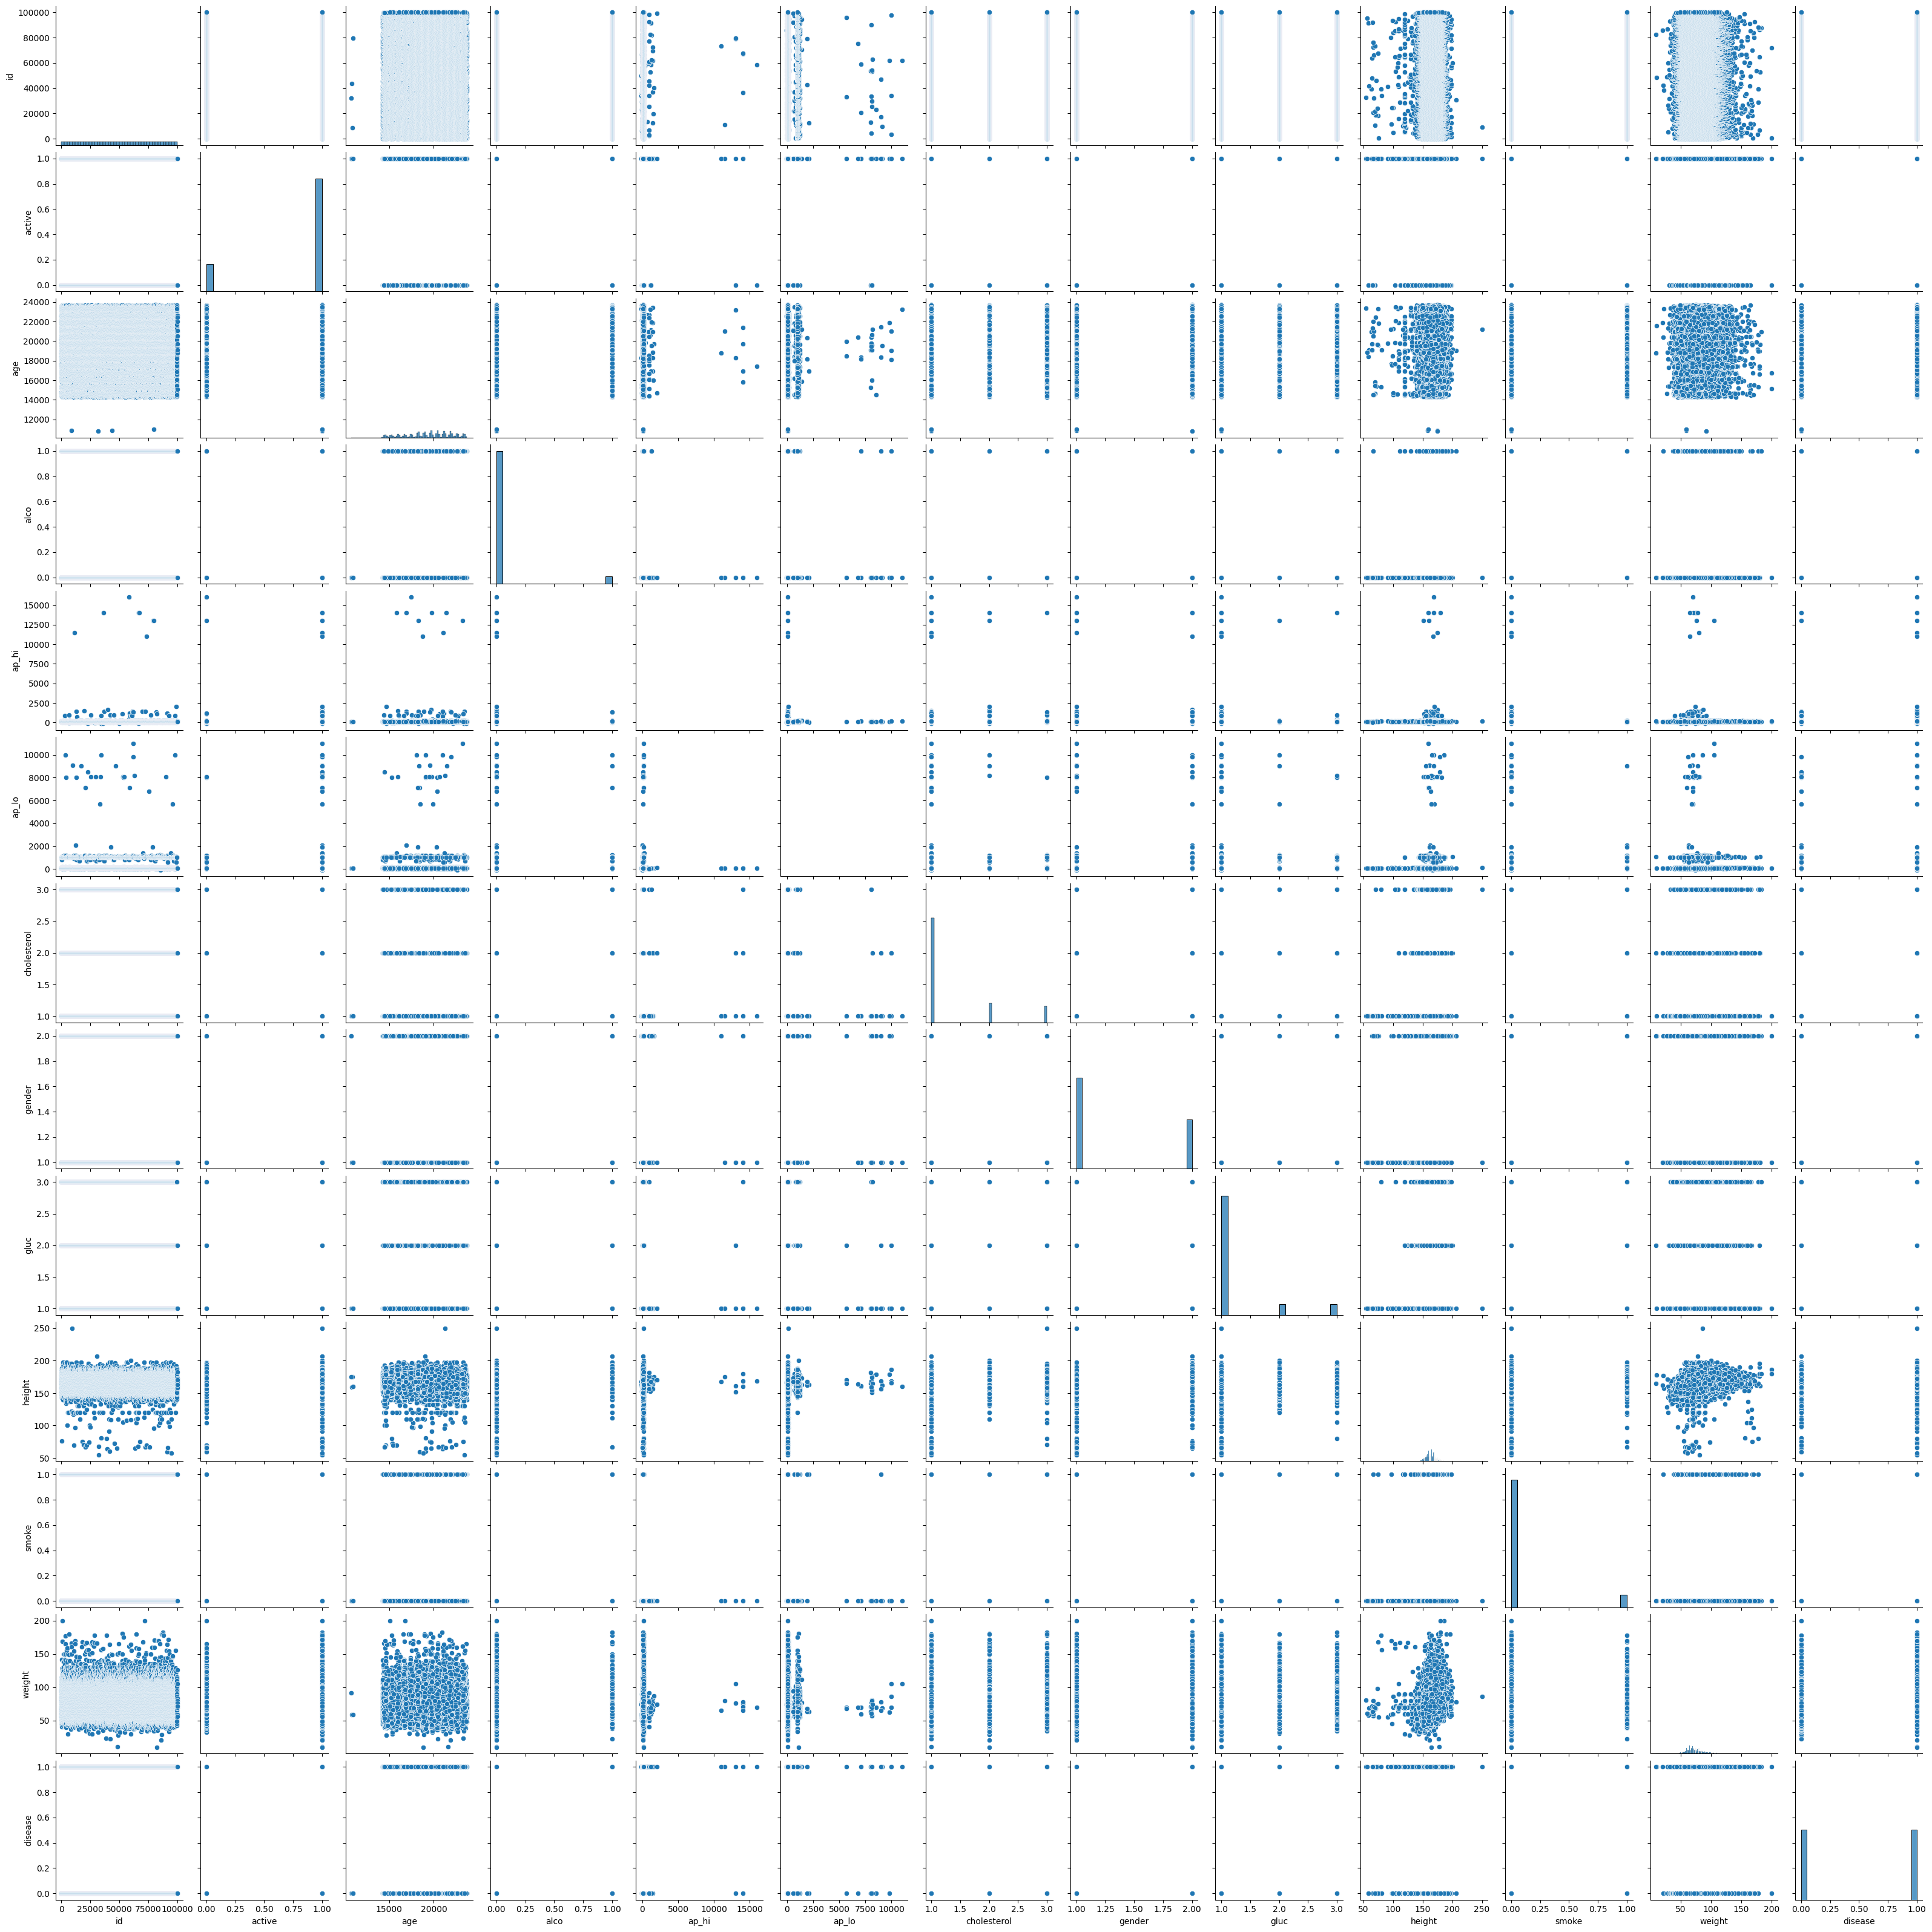

In [11]:
# visualize pairplot
sns.pairplot(disease)

In [12]:
# column name
disease.columns

Index(['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = {}
for column in disease.columns:
    if disease[column].dtype == 'object':
        le = LabelEncoder()
        disease[column] = le.fit_transform(disease[column])
        label_encoder[column] = le

# Feature and target
X = disease.drop(['disease'], axis=1)
y = disease['disease']

In [14]:
disease.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,2021-05-03,1,0,1,18393,0,110,80,1,2,1,168,1,0,62.0,0
1,2021-08-05,2,1,1,20228,0,140,90,3,1,1,156,0,0,85.0,1
2,2022-11-13,1,2,0,18857,0,130,70,3,1,1,165,2,0,64.0,1
3,2018-10-31,3,3,1,17623,0,150,100,1,2,1,169,5,0,82.0,1
4,2020-09-25,3,4,0,17474,0,100,60,1,1,1,156,1,0,56.0,0


In [15]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=2529)

In [16]:
# verify shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((49000, 15), (21000, 15), (49000,), (21000,))

In [17]:
# Assuming 'date' is the only datetime column
# Convert 'date' to numerical representation (e.g., Unix timestamp)
X_train['date'] = pd.to_numeric(pd.to_datetime(X_train['date']))
X_test['date'] = pd.to_numeric(pd.to_datetime(X_test['date']))
# Feature Scaling
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)

In [18]:
# select model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import classification_report,accuracy_score

In [20]:
# predict with model
# predict with model
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy:", f"{logreg_accuracy*100:.2f}")

Accuracy: 72.35


In [21]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10538
           1       0.74      0.68      0.71     10462

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64     10538
           1       0.64      0.64      0.64     10462

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000

Accuracy: 0.6372

SVM Performance:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10538
           1       0.74      0.69      0.72     10462

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

Accuracy: 0.7260

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10538
           1       0.74      0.70      0.72     10462

    accuracy                           0.73     21000
   macro avg       0